In [2]:
# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import sympy as sp
from sympy.utilities.lambdify import lambdify
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib.ticker import LogLocator
import control

In [4]:
VOM_AC = pd.read_csv('/home/kegedy/Documents/EE473/Lab4/VOM_AC.csv')
VOM_transient = pd.read_csv('/home/kegedy/Documents/EE473/Lab4/VOM_transient.csv')
VOP_AC = pd.read_csv('/home/kegedy/Documents/EE473/Lab4/VOP_AC.csv')
VOP_transient = pd.read_csv('/home/kegedy/Documents/EE473/Lab4/VOP_transient.csv')

In [38]:
VOM_transient.head()

,/VOM X,/VOM Y
0,0.00000,0.673721
1,0.00001,0.673730
2,0.00003,0.673748
3,0.00007,0.673782
4,0.00012,0.673819


In [21]:
VOM_AC['magnitude'] = abs(VOM_AC['/VOM YRe']+VOM_AC['/VOM YReImag'])/1e-6

In [24]:
VOP_AC['magnitude'] = abs(VOP_AC['/VOP YRe']+VOP_AC['/VOP YReImag'])/1e-6

In [22]:
VOM_AC.head()

,/VOM X,/VOM YRe,/VOM YReImag,magnitude
0,0.100000,0.000144,-1.267843e-14,144.129498
1,0.158489,0.000144,-2.009396e-14,144.129498
2,0.251189,0.000144,-3.184677e-14,144.129498
3,0.398107,0.000144,-5.047372e-14,144.129498
4,0.630957,0.000144,-7.999546e-14,144.129498


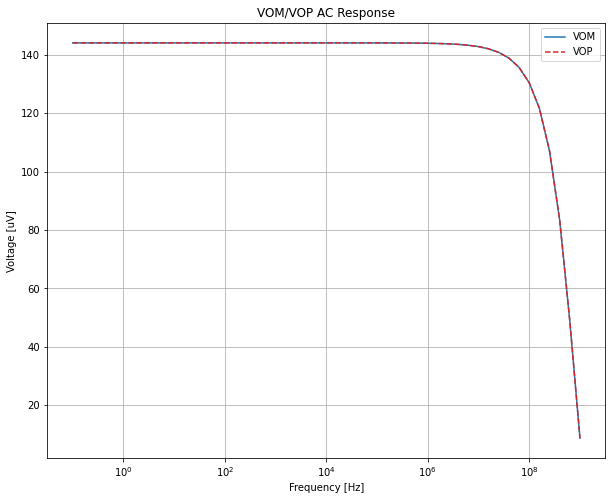

In [37]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_title('VOM/VOP AC Response')
ax.semilogx(VOM_AC['/VOM X'],VOM_AC['magnitude'],label='VOM',color='tab:blue')
ax.semilogx(VOP_AC['/VOP X'],VOP_AC['magnitude'],linestyle='--',label='VOP',color='tab:red')
ax.set_ylabel('Voltage [uV]')
ax.set_xlabel('Frequency [Hz]')
#ax.set_xlim([12.35e-9,12.75e-9])
#ax.ticklabel_format(axis="x", style="sci", scilimits=(-9,-9))
ax.grid(which='both', axis='both')
ax.legend();

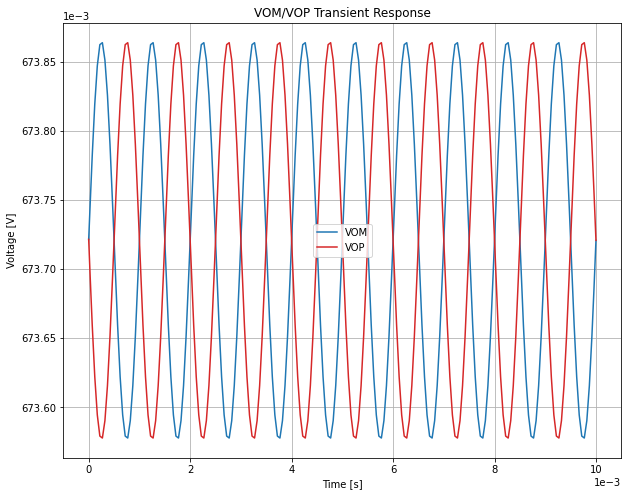

In [44]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_title('VOM/VOP Transient Response')
ax.plot(VOM_transient['/VOM X'],VOM_transient['/VOM Y'],label='VOM',color='tab:blue')
ax.plot(VOP_transient['/VOP X'],VOP_transient['/VOP Y'],label='VOP',color='tab:red')
ax.set_ylabel('Voltage [V]')
ax.set_xlabel('Time [s]')
#ax.set_xlim([12.35e-9,12.75e-9])
ax.ticklabel_format(axis="y", style="sci", scilimits=(-3,-3))
ax.ticklabel_format(axis="x", style="sci", scilimits=(-3,-3))
ax.grid(which='both', axis='both')
ax.legend();

In [45]:
min(VOP_transient['/VOP Y'])

0.673577715700079

In [46]:
max(VOP_transient['/VOP Y'])

0.6738636966926956